In [ ]:
# de adaugat pt model...
model <- lm()


hist(beta0_hat, probability = True, main = "", xlab = expression(hat(beta[0])), col = "pink")

# New section

In [ ]:
data_Galton <- read.table("galton-stata11.tab", header = TRUE)

data_Galton <- data_Galton %>%
  mutate(mother_c = 1.08 * mother,
    avg_parents = (father + mother_c)/2,
    height_c = ifelse(gender == "F", 1.08*height, height))

plot(data_Galton$avg_parents, data_Galton$height_c,
     bty = "n",
     xlab = "inaltimea medie a parintilor",
     ylab = "ianltimea copiilor",
     pch = 16,
     col = "grey70")

galton_model <- lm(height_c ~ avg_parents, data = data_Galton)

abline(galton_model$coefficients, col = myred,
       lwd = 2, lty = 1)
abline(a = 0, b = 1)

ERROR: Error in data_Galton %>% mutate(mother_c = 1.08 * mother, avg_parents = (father + : could not find function "%>%"


ERROR: Error in eval(mf, parent.frame()): object 'height' not found


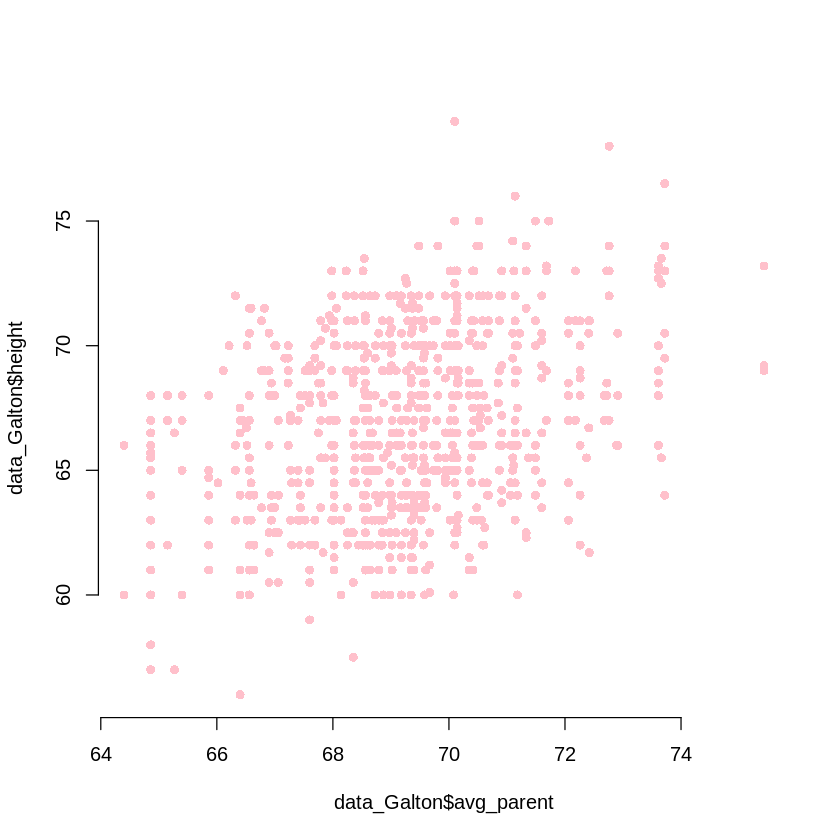

In [ ]:
data_Galton <- read.table("galton-stata11.tab",
                          header = TRUE)

data_Galton$mother_c <- data_Galton$mother * 1.08
data_Galton$avg_parent <- (data_Galton$father + data_Galton$mother_c) / 2

table(data_Galton$avg_parent, data_Galton$height)   #tabel

plot(data_Galton$avg_parent, data_Galton$height,    #grafic
     bty = "n", pch = 16, col = "pink")

abline(data_Galton$avg_parent, data_Galton$height,  #dreapta
       col = "orange")
galton_model <- lm(height - avg_parent,    #model de regresie simpla
                   data = data_Galton)
abline(galton_model$coefficients,
       col = 'red')

In [ ]:
##Datele lui sir Francis Galton

data_Galton <- read.table("C:/Users/mirun/Desktop/Modele de Regresie/galton-stata11.tab",header=TRUE)
data_Galton$mother_c <- data_Galton$mother*1.08 #adauga coeficientul de corectie
data_Galton$avg_parents <- (data_Galton$father+data_Galton$mother_c)/2 #calculez media inaltimii parintilor
table(data_Galton$avg_parents,data_Galton$height)

#Afisez diagrama de imprastiere
plot(data_Galton$avg_parents,data_Galton$height,
     bty="n",
     pch=16,
     col="grey") #daca pun si argumentul asp=1 imi scaleaza axele a.i. sa am un patrat nu un dreptunghi

#Afisez dreapta de panta 1 care imi arata egalitatea de inaltimi
abline(a=0,b=1,col="black")

#Explic inaltimea copiilor in raport cu media inaltimii parintilor
galton_model <- lm(height~avg_parents,
                   data=data_Galton)

#Desenez dreapta care are panta mai mica decat prima bisectoare (dreapta desenata cu negru)
#Aproximeaza mult mai bine relatia dintre inaltimea copiilor si inaltimea medie a parintilor
abline(galton_model$coefficients,
       col="red")



# Suita de pachete Tidyverse

install.packages("tidyverse")
library(tidyverse)

## Importarea datelor

library(readxl)
data <- read_csv("gapminder-FiveYearData.csv")
View(data)
names(data)

# Manipularea datelor

# operatorul %>% (pipe) Ctrl+Shift+M "si apoi" permite compunerea functiilor h(g(f(x))) x %>% f() f(x) x %>% f() %>% g() g(f(x))

data %>%
  filter(continent=="Asia", year==2007) %>%
  select(country,gdpPercap)

# Scriere echivalenta
data1 <- data[data$continent=="Asia" & data$year==2007, c("country","gdpPercap")]
data1

# Selectam coloanele cu select()

data %>%
  select("country","gdpPercap") %>%
  head()

data %>%
  select(country,gdpPercap) %>%
  head()

data <- data %>%
  mutate(`dgp per cap`=gdpPercap) #adauga coloana dgp per cap care are valorile egale cu cele din gdpPercap


data %>%
  select(country,`dgp per cap`) %>%
  head(n=10) #in head() pun numarul de observatii pe care vreau sa mi-l afiseze de la inceput
#daca vreau observatii de la final in loc de head() folosesc tail()

#gdp_pcap e un fisier de tip Excel pe care inca nu il am
gdp_pcap %>%
  select(-(`1800`:`2090`)) #selectez coloanele de la 2091 pana la final
#- in fata imi elimina coloanele reapective

data %>%
  select(-(year)) #afisez toate coloanele in afara de year

data %>%
  select(-(country:lifeExp)) #scot toate coloanele in afara de cele de la country pana la lifeExp inclusiv

data %>%
  select(-`dgp per cap`) #afisez coloanele fata dgp per cap

data <- data %>%
  select(-`dgp per cap`) #revin la setul de date intiale

gdp_pcap %>%
  select(ends_with("0")) #selectez datele din tabel care se termina cu 0

gdp_pcap %>%
  select(starts_with("18")) #selectez datele din tabel care incep cu 18

data %>%
  select(contains("nt")) #selectez coloanele care contin nt


#Selectez coloanele astfel incat year, country si gdpPercap sa fie primele care apar, iar restul apar in ordinea din setul de date initial
data %>%
  select(year,country,gdpPercap,everything()) %>%
  head()



# Educational attainment of young people in English towns

The [dataset](https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/educationandchildcare/datasets/educationalattainmentofyoungpeopleinenglishtownsdata/200708201819/youngpeoplesattainmentintownsreferencetable1.xlsx) this week comes from [The UK Office for National Statistics](https://www.ons.gov.uk/).
It was explored in the July 2023 article ["Why do children and young people in smaller towns do better academically than those in larger towns?"](https://www.ons.gov.uk/peoplepopulationandcommunity/educationandchildcare/articles/whydochildrenandyoungpeopleinsmallertownsdobetteracademicallythanthoseinlargertowns/2023-07-25).
Thank you [Andrea Carpignani](https://github.com/acarpignani) for the dataset suggestion.

The article this week contains several plots, one of which is interactive. Can you reproduce them? Can you find anything in the data that isn't explored in the article?

## The Data

```{r}
# Option 1: tidytuesdayR package
## install.packages("tidytuesdayR")

tuesdata <- tidytuesdayR::tt_load('2024-01-23')
## OR
tuesdata <- tidytuesdayR::tt_load(2024, week = 4)

english_education <- tuesdata$english_education

# Option 2: Read directly from GitHub

english_education <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-23/english_education.csv')
```

## How to Participate

- [Explore the data](https://r4ds.hadley.nz/), watching out for interesting relationships. We would like to emphasize that you should not draw conclusions about **causation** in the data. There are various moderating variables that affect all data, many of which might not have been captured in these datasets. As such, our suggestion is to use the data provided to practice your data tidying and plotting techniques, and to consider for yourself what nuances might underlie these relationships.
- Create a visualization, a model, a [shiny app](https://shiny.posit.co/), or some other piece of data-science-related output, using R or another programming language.
- [Share your output and the code used to generate it](../../../sharing.md) on social media with the #TidyTuesday hashtag.

### Data Dictionary

# `english_education.csv`

|variable |class |description |
|:--------|:-----|:-----------|
|town11cd |character |Town/city geography code (2011) |
|town11nm |character |Town/city geography name (2011) |
|population_2011 |numeric |Measure of the usual resident population in the town/city |
|size_flag |character |Size category of the built-up area or built-up area subdivision based on resident population (from Census 2011) |
|rgn11nm |character |English region name |
|coastal |character |Variable used to describe towns as coastal or non-coastal |
|coastal_detailed |character |Coastal towns split by size and by seaside towns and other coastal (non-seaside) towns |
|ttwa11cd |character |Travel-to-work area code (Census 2011 version) |
|ttwa11nm |character |Travel-to-work area name (Census 2011 version) |
|ttwa_classification |character |Travel to work area classification |
|job_density_flag |character |Variable used to describe towns as working, residential or mixed. |
|income_flag |character |Variable used to describe towns as lower income deprivation, mid income deprivation or higher income deprivatio |
|university_flag |character |Variable used to describe whether the town/city has a university |
|level4qual_residents35_64_2011 |character |Proportion of the town/city residents aged 35-64 with a Level 4 qualification or above. |
|ks4_2012_2013_counts |numeric |Count of pupils in the town/city in the 2012/13 Key stage 4 cohort |
|key_stage_2_attainment_school_year_2007_to_2008 |numeric |Proportion of pupils that achieved level 4 or above (expected level) in key stage 2 in English and Maths in the 2007 to 2008 school year |
|key_stage_4_attainment_school_year_2012_to_2013 |numeric |Proportion of pupils that achieved 5 GCSE or more, including English and Maths, with grades A*-C in the 2012 to 2013 school year |
|level_2_at_age_18 |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort that achieved level 2 qualifications at the age 18. |
|level_3_at_age_18 |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort that achieved level 3 qualifications at the age 18. |
|activity_at_age_19_full_time_higher_education |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort in full time higher education at the age 19. |
|activity_at_age_19_sustained_further_education |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort in sustained further education at the age 19. |
|activity_at_age_19_appprenticeships |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort in an apprenticeship at the age 19. |
|activity_at_age_19_employment_with_earnings_above_0 |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort in sustained employment at the age 19. |
|activity_at_age_19_employment_with_earnings_above_10_000 |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort in sustained employment earning £10,000 or above at the age 19. |
|activity_at_age_19_out_of_work |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort claiming out-of-work benefits at the age 19. |
|highest_level_qualification_achieved_by_age_22_less_than_level_1 |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort with less than a Level 1 qualification at age 22. |
|highest_level_qualification_achieved_by_age_22_level_1_to_level_2 |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort with a level 1 or level 2 qualification at age 22. |
|highest_level_qualification_achieved_by_age_22_level_3_to_level_5 |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort with level 3, level 4 or level 5 qualification at age 22. |
|highest_level_qualification_achieved_by_age_22_level_6_or_above |numeric |Proportion of the town/city's 2012/13 key stage 4 cohort with level 6 or above qualification at age 22. |
|highest_level_qualification_achieved_b_age_22_average_score |numeric |Town/city highest qualification average score based on highest levels of qualifications achieved of the 2012/13 KS4 cohort. |
|education_score |numeric |Town/city education score based on attainment levels of the 2012/13 Key stage 4 cohort. |

### Cleaning Script

``` r
library(tidyverse)
library(here)
library(fs)
library(withr)

working_dir <- here::here("data", "2024", "2024-01-23")

xls_path <- withr::local_tempfile(fileext = ".xlsx")
download.file(
  "https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/educationandchildcare/datasets/educationalattainmentofyoungpeopleinenglishtownsdata/200708201819/youngpeoplesattainmentintownsreferencetable1.xlsx",
  xls_path,
  mode = "wb"
)

english_education <- readxl::read_xlsx(xls_path, sheet = "Data", na = "*") |>
  janitor::clean_names()

readr::write_csv(
  english_education,
  fs::path(working_dir, "english_education.csv")
)
```